## Cloning by homologous recombination: construction of pGUP1

The construction of the vector pGUP1 was described in the publication below:

In [8]:
# NBVAL_SKIP
from IPython.display import IFrame
IFrame('https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1474799', width="100%", height=500)

The cloning is described in the paper on the upper left side of page 2637:

    "The expression vectors harboring GUP1 or GUP1H447A were obtained as follows: the open reading frame of GUP1
    was amplified by PCR using plasmid pBH2178 (kind gift from Morten Kielland-Brandt) as a template and using
    primers  and , underlined sequences being homologous to the target vector pGREG505 (Jansen et al., 2005). 
    The PCR fragment was purified by a PCR purification kit (QIAGEN, Chatsworth, CA) and introduced into 
    pGREG505 by co transfection into yeast cells thus generating pGUP1 (Jansen et al., 2005)."
    
The description above was used to create the image below:

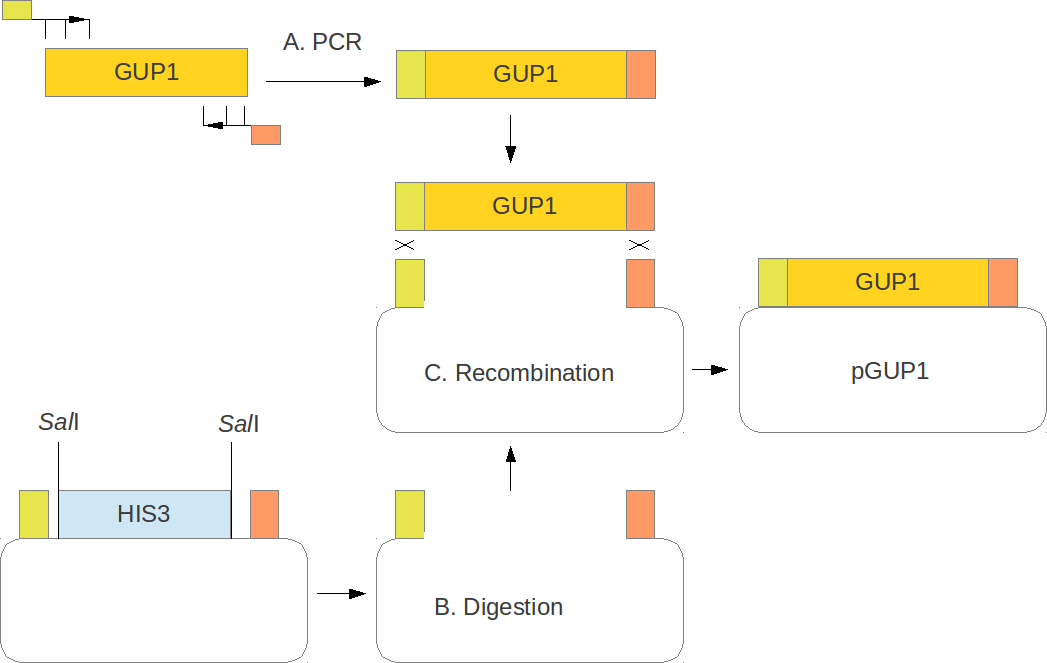

In [2]:
from IPython.core.display import Image
Image('figure2.png', width=600)

Briefly, two primers (GUP1rec1sens and GUP1rec2AS) were used to amplify the [GUP1 gene](http://www.yeastgenome.org/locus/S000003052/overview) from _Saccharomyces cerevisiae_ chromosomal DNA.

[Jansen G, Wu C, Schade B, Thomas DY, Whiteway M. 2005. Drag&Drop cloning in yeast. Gene, 344: 43–51.](http://www.sciencedirect.com/science/article/pii/S0378111904006420)

Jansen et al describe the pGREG505 vector and that it is digested with SalI before cloning. The SalI digests the vector in two places, so a fragment containing the HIS3 gene is removed.

This is a cloning in three steps (see above figure):

1. PCR of the GUP1 locus using GUP1rec1sens GUP1rec2AS, resulting in
   a linear insert (A). The primer sequences are given in Bosson et al. 
   The template sequence can be found at Saccharomyces Genome Database (SGD)

2. Digestion of the plasmid pGREG505 with SalI, This step is not
   mentioned explicitly in Bosson et. al, but is evident from Jansen et al. (B). 
   This digestion removes a DNA fragment containing the HIS3 marker gene
   from the final construct. The sequence of the pGREG505 plasmid (as well as
   the physical plasmid itself) can be obtained from 
   [EUROSCARF](http://www.euroscarf.de/plasmid_details.php?accno=P30350)

3. Recombination between the linear insert and the linear vector (C).

The SalI sites are visible in the plasmid drawing of pGREG505 below:


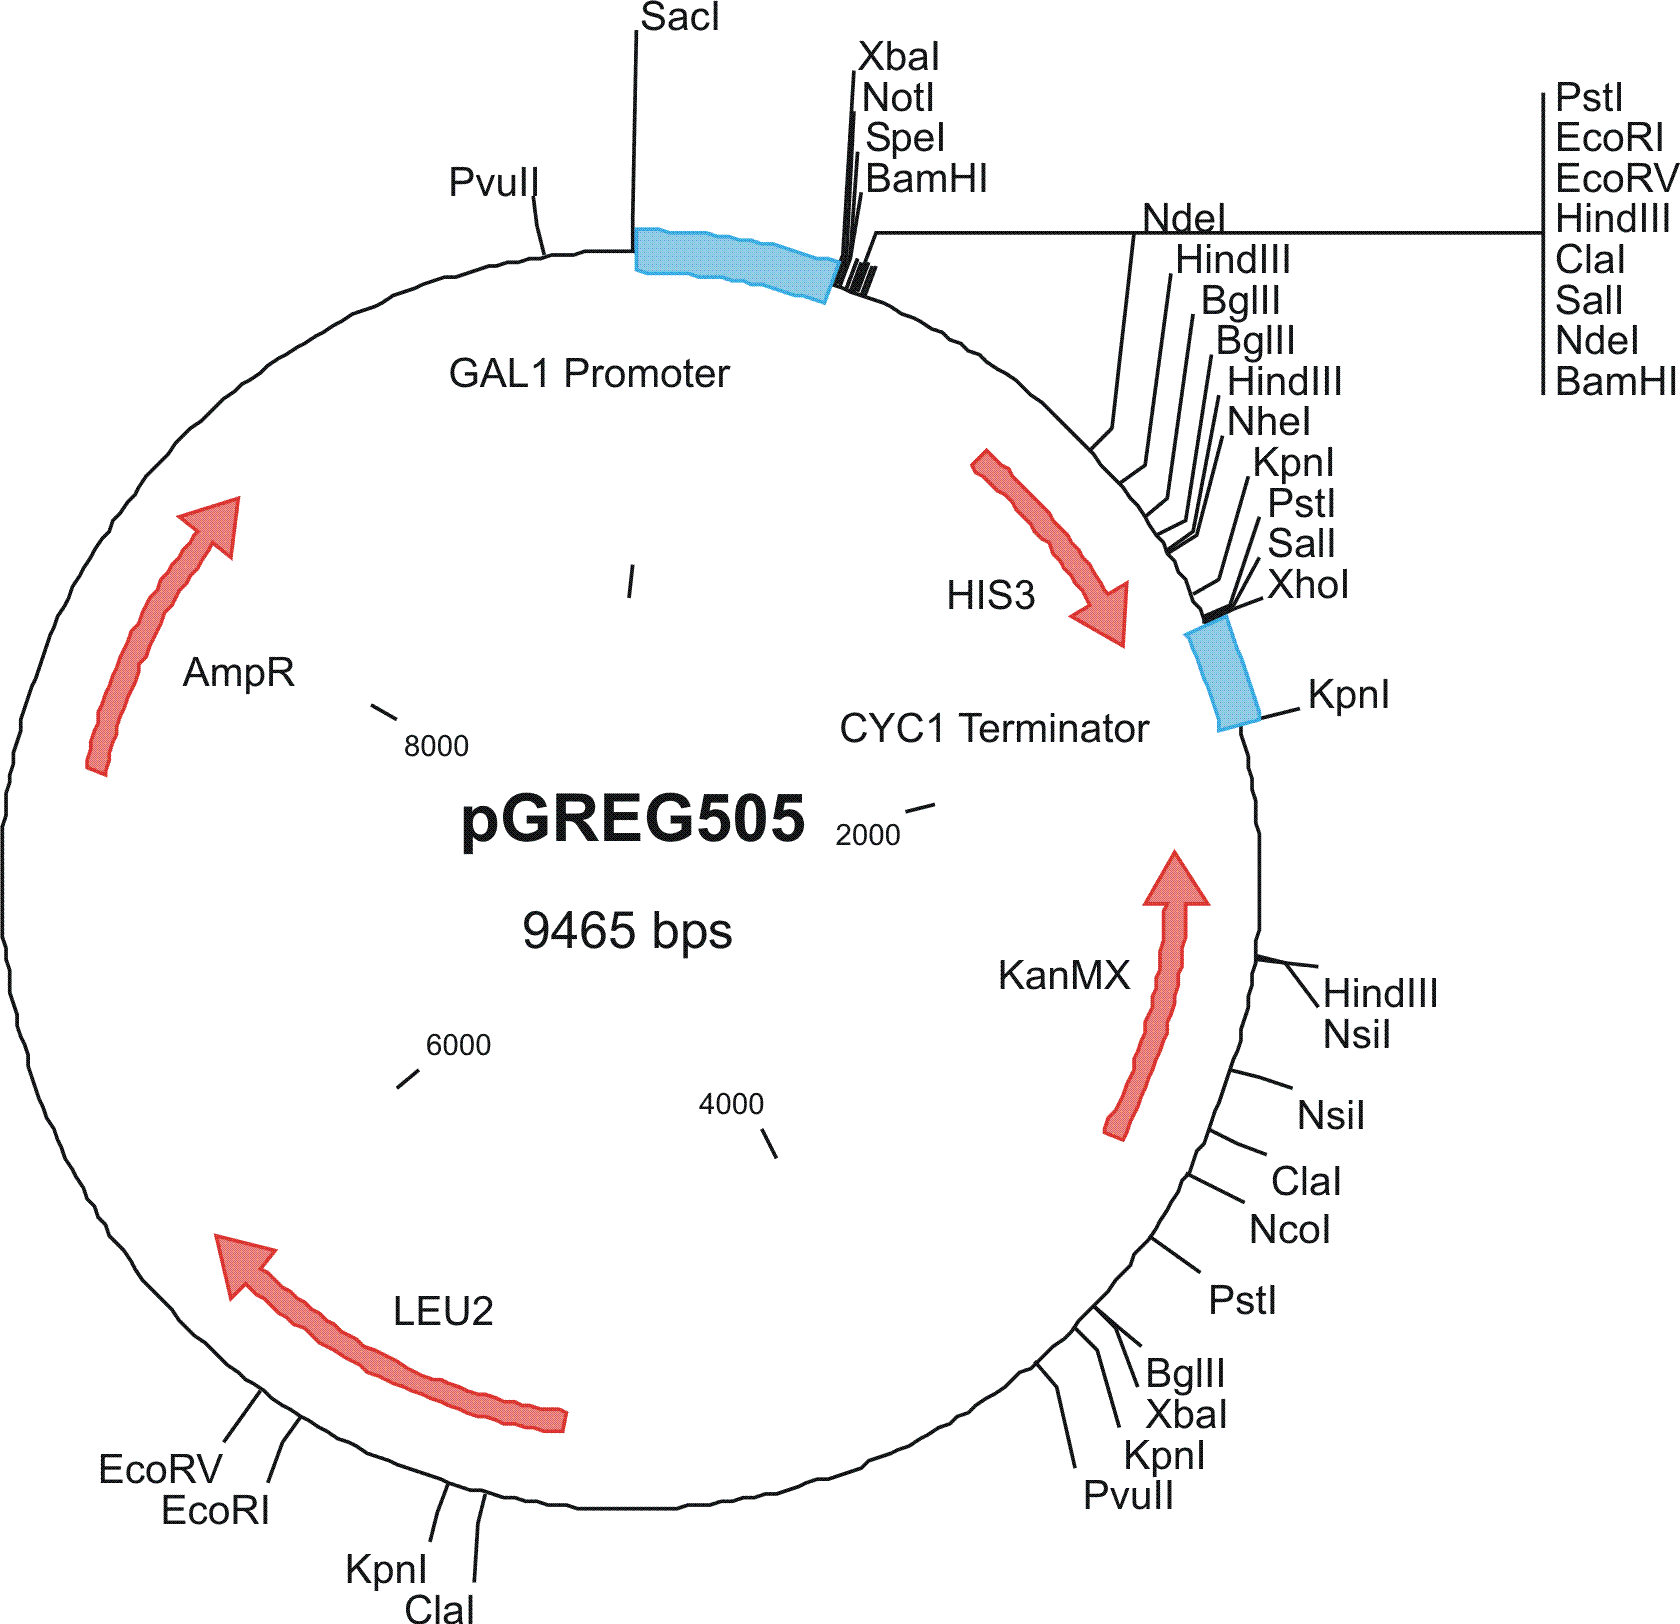

In [3]:
Image('pGREG505.png',width=400)

We will now replicate the cloning procedure using pydna.

In [4]:
from pydna.parsers import parse_primers 

The primer sequences are read into [BioPython](http://biopython.org/) [SeqRecord](http://biopython.org/wiki/SeqRecord) objects. Primers are single stranded DNA molecules, so 
SeqRecords are adequate for describing them.

In [5]:
GUP1rec1sens, GUP1rec2AS = parse_primers('''
>GUP1rec1sens 
gaattcgatatcaagcttatcgataccgatgtcgctgatcagcatcctgtc

>GUP1rec2AS
gacataactaattacatgactcgaggtcgactcagcattttaggtaaattccg''')

The template sequences is th GUP1 locus from SGD. It is read remotely from [Genbank]() into a pydna Dseqrecord object.

In [6]:
from pydna.genbank import Genbank

In [7]:
gb = Genbank("bjornjobb@gmail.com")
GUP1_locus = gb.nucleotide("NC_001139 REGION: complement(350616..352298)")

The pGREG505 vector sequence is downloaded from [EUROSCARF](http://www.euroscarf.de/files/dna/P30350/P30350%20%282013-10-11%2013_49_14%29.dna). This sequence is unfortunately not correctly formatted according to the [Genbank format](https://www.ncbi.nlm.nih.gov/Sitemap/samplerecord.html).

This is unfortunately not uncommon to find "Genbank" files online that are not properly formatted. The BioPython parser on which the pydna parser based is somewhat sensitive, which can be a good or a bad thing depending on the situation. 

Pydna provide a Genbank cleaning function that tries to salvage as much as possible of the sequence.
In the cells below

1. file is dowloaded as text
2. cleaned using the gbtext_clean function
3. read into a Dseqrecord object using the read function
4. The cSEGUID checksum is calculated in order to confirm the integrity of the sequence.

The cSEGUID method provide a checksum for circular sequences. Look at this [blog post](http://ochsavidare.blogspot.pt/2016/02/checksum-for-circular-biological.html) for further information on the cSEGUID checksum and its definition. The cSEGUID checksum can be caluclated for any sequence with a GUI app called SEGUID calculator. This can be found [here](https://github.com/BjornFJohansson/seguid_calculator). The cSEGUID is the identical with the checksum calulated with the cSEGUID checksum, proving that the file cleanup did not alter the sequence. It is probably best to save a properly formatted sequence in a local file that has been verified.

In [8]:
from pydna.download import download_text
from pydna.genbankfixer import gbtext_clean
from pydna.readers import read

In [9]:
gbtext=download_text("http://www.euroscarf.de/files/dna/P30350/P30350%20(2013-10-11%2013_49_14).dna")
cleaned_gb_text = gbtext_clean(gbtext)
pGREG505 = read(cleaned_gb_text.gbtext)
pGREG505.cseguid()

UVIuDWAVWkUAD0_U-wFHWG7ARmE

The PCR product sequence is simulated from the primers and the template sequence using the pydna.pcr function. The pydna.Amplicon class offer greater control over the pcr parameters.

In [10]:
from pydna.amplify import pcr

In [11]:
insert = pcr(GUP1rec1sens, GUP1rec2AS, GUP1_locus)

In [12]:
insert.name="GUP1"

We can inspect how the primers anneal by using the ```.figure()``` method:

In [13]:
insert.figure()

                            5atgtcgctgatcagcatcctgtc...cggaatttacctaaaatgctga3
                                                       |||||||||||||||||||||| tm 54.5 (dbd) 63.1
                                                      3gccttaaatggattttacgactcagctggagctcagtacattaatcaatacag5
5gaattcgatatcaagcttatcgataccgatgtcgctgatcagcatcctgtc3
                             ||||||||||||||||||||||| tm 62.3 (dbd) 71.1
                            3tacagcgactagtcgtaggacag...gccttaaatggattttacgact5

A suggested PCR program is also available:

In [14]:
insert.program()


Taq (rate 30 nt/s) 35 cycles             |1742bp
95.0°C    |95.0°C                 |      |Tm formula: Biopython Tm_NN
|_________|_____          72.0°C  |72.0°C|SaltC 50mM
| 03min00s|30s  \         ________|______|Primer1C 1.0µM
|         |      \ 53.9°C/ 0min52s| 5min |Primer2C 1.0µM
|         |       \_____/         |      |GC 37%
|         |         30s           |      |4-12°C

We need to import the [SalI](http://rebase.neb.com/rebase/enz/SalI.html) restriction enzyme from Biopython.

In [15]:
from Bio.Restriction import SalI

We cut the vector with SalI using the cut method. 

In [16]:
linear_vector, his3  = pGREG505.cut(SalI)

The linearized pGREG505 has 8301 bp and is of course linear.

In [17]:
linear_vector

Dseqrecord(-8301)

The pydna Assembly class can simulate [homologous recombination](https://en.wikipedia.org/wiki/Homologous_recombination) as well as [fusion PCR](https://en.wikipedia.org/wiki/Overlap_extension_polymerase_chain_reaction) and [Gibson assembly](https://en.wikipedia.org/wiki/Gibson_assembly).


The variable asm, below will contain all possible recombination products between the two linear fragments.
The table below gives an overview of the recombination products as well as parameters used. The two last rows show that one circular [9981] and four linear products [10013] [10011] [32] and [30] were formed.

We are only interested in the circular product, since the pGUP1 plasmid is expected to be circular.

In [18]:
from pydna.assembly import Assembly

In [19]:
asm = Assembly((linear_vector, insert))

The cirular product can be accessed from the circular_products property of the asm object.

In [20]:
candidate = asm.assemble_circular()[0]

We can study this further by accessing the figure method. We can see from the figure below, that the circular product is what we want.

In [21]:
candidate.figure()

 -|name|28
|       \/
|       /\
|       28|GUP1|30
|               \/
|               /\
|               30-
|                  |
 ------------------

The sync method below makes sure that our new vector starts from the same position as the pGREG vector did. This makes our recombinant plasmid easier to read and compare in a plasmid editor. Pydna can incorporate the free [ApE](http://biologylabs.utah.edu/jorgensen/wayned/ape/) plasmid editor in a way that it can be opened on any sequence object direcly from a Jupyter notebook or an IPython shell.

In [22]:
pGUP1 = candidate.synced(pGREG505) 

Finally we write the sequence to a local file.

In [23]:
pGUP1.write("pGUP1.gb")

pGUP1.gb